Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Import Dataset

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Accidents.csv",  parse_dates=True)

In [3]:
obs, features = dataset.shape
print("Observations:" + str(obs) +" features:" + str(features) )

Observations:5008 features:17


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
dataset.head(5)

,date,Time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",18:30,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


Data Preprocessing

In [6]:
#replace all ? values with Nan
dataset = dataset.replace({'?': np.nan})

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  5008 non-null   object
 1   Time                  3496 non-null   object
 2   location              5003 non-null   object
 3   operator              4998 non-null   object
 4   flight_no             1326 non-null   object
 5   route                 4246 non-null   object
 6   ac_type               4995 non-null   object
 7   registration          4736 non-null   object
 8   cn_ln                 4341 non-null   object
 9   all_aboard            4991 non-null   object
 10  passengers_aboard     4787 non-null   object
 11  crew_aboard           4789 non-null   object
 12  all_fatalities        5000 non-null   object
 13  passenger_fatalities  4773 non-null   object
 14  crew_fatalities       4773 non-null   object
 15  ground                4964 non-null   

In [8]:
dataset.isnull().sum()

date                       0
Time                    1512
location                   5
operator                  10
flight_no               3682
route                    762
ac_type                   13
registration             272
cn_ln                    667
all_aboard                17
passengers_aboard        221
crew_aboard              219
all_fatalities             8
passenger_fatalities     235
crew_fatalities          235
ground                    44
summary                   59
dtype: int64

In [9]:
#replacing incorrect and nan time data
dataset['Time'] = dataset['Time'].replace(np.nan, '00:00') 
dataset['Time'] = dataset['Time'].str.replace('c: ', '')
dataset['Time'] = dataset['Time'].str.replace('c:', '')
dataset['Time'] = dataset['Time'].str.replace('c', '')
dataset['Time'] = dataset['Time'].str.replace('12\'20', '12:20')
dataset['Time'] = dataset['Time'].str.replace('18.40', '18:40')
dataset['Time'] = dataset['Time'].str.replace('0943', '09:43')
dataset['Time'] = dataset['Time'].str.replace('22\'08', '22:08')
dataset['Time'] = dataset['Time'].str.replace('114:20', '00:00')
dataset['Time'] = dataset['Time'].str.replace('91:05:00', '00:00')
dataset['Time'] = dataset['Time'].str.replace('90:00:00', '00:00')
dataset['Time'] = dataset['Time'].str.replace('24:05:00', '00:00')
dataset['Time'] = dataset['Time'].str.replace('24:05:00', '00:00')

In [10]:
#capitalize so as to remove duplicates when plotting
dataset["ac_type"] = dataset.ac_type.str.upper()
dataset["operator"] = dataset.operator.str.upper()
dataset["route"] = dataset.route.str.upper()
dataset["location"] = dataset.location.str.upper()

Feature Engineering

In [11]:
#create new features
dataset["datetime"] = dataset["date"]+" "+dataset["Time"]

In [12]:
dataset["datetime"] = pd.to_datetime(dataset["datetime"])

In [13]:
dataset['year'] = pd.DatetimeIndex(dataset['datetime']).year

In [14]:
dataset['month'] = pd.DatetimeIndex(dataset['datetime']).month

In [15]:
dataset['day'] = pd.DatetimeIndex(dataset['datetime']).dayofweek

In [16]:
dataset['military_private'] = dataset['operator'].str.contains('MILITARY')
dataset['military_private'] = dataset['military_private'].replace(True, 'military')
dataset['military_private'] = dataset['military_private'].replace(False, 'private')

In [17]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

dataset['season'] = dataset['month'].apply(get_season)

In [35]:
dataset.head(5)

,date,Time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary,datetime,year,month,day,military_private,season
0,"September 17, 1908",17:18,"FORT MYER, VIRGINIA",MILITARY - U.S. ARMY,NaN,DEMONSTRATION,WRIGHT FLYER III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908-09-17 17:18:00,1908,9,3,military,autumn
1,"September 07, 1909",00:00,"JUVISY-SUR-ORGE, FRANCE",NaN,NaN,AIR SHOW,WRIGHT BYPLANE,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07 00:00:00,1909,9,1,NaN,autumn
2,"July 12, 1912",06:30,"ATLANTIC CITY, NEW JERSEY",MILITARY - U.S. NAVY,NaN,TEST FLIGHT,DIRIGIBLE,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912-07-12 06:30:00,1912,7,4,military,summer
3,"August 06, 1913",00:00,"VICTORIA, BRITISH COLUMBIA, CANADA",PRIVATE,NaN,NaN,CURTISS SEAPLANE,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913-08-06 00:00:00,1913,8,2,private,summer
4,"September 09, 1913",18:30,OVER THE NORTH SEA,MILITARY - GERMAN NAVY,NaN,NaN,ZEPPELIN L-1 (AIRSHIP),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00,1913,9,1,military,autumn


EDA/Visualizations


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Count of accidents per year')]

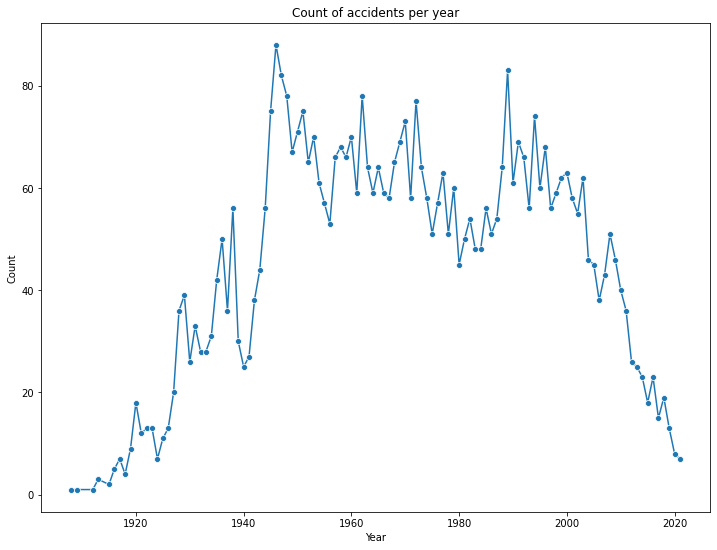

In [19]:
#no accidents by year
df = dataset.groupby('year')['date'].count().reset_index()
plt.figure(figsize=(12,9))
g = sns.lineplot(data=df,x = 'year', y= 'date', marker='o')
g.set( xlabel = "Year", ylabel = "Count", title= 'Count of accidents per year')


[Text(0, 0.5, 'Count'),
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')],
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Count of accidents per month')]

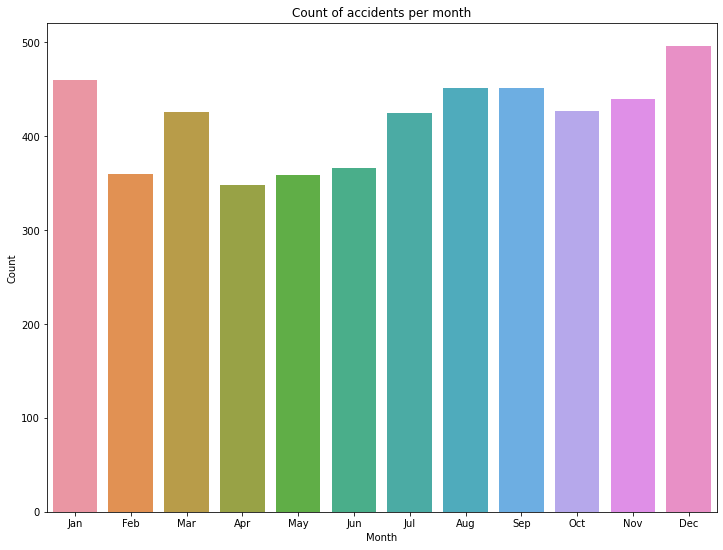

In [20]:
#no accidents by month
df = dataset.groupby('month')['date'].count().reset_index()
plt.figure(figsize=(12,9))
g = sns.barplot(x = 'month', y= 'date', data = df)
g.set( xlabel = "Month", ylabel = "Count", title= 'Count of accidents per month', xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Seasons'),
 Text(0.5, 1.0, 'Count of accidents per season')]

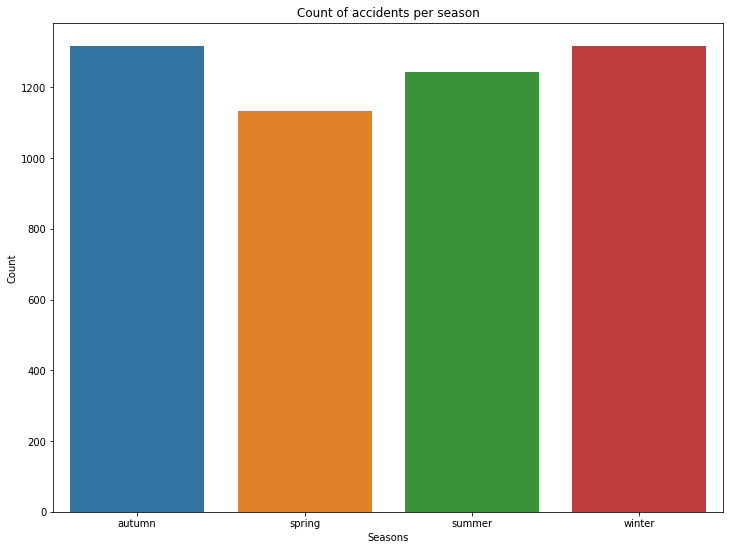

In [21]:
#no accidents by season
df = dataset.groupby('season')['date'].count().reset_index()
plt.figure(figsize=(12,9))
g = sns.barplot(x = 'season', y= 'date', data = df)
g.set( xlabel = "Seasons", ylabel = "Count", title= 'Count of accidents per season')


[Text(0, 0.5, 'Count'),
 [Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday'),
  Text(0, 0, 'Sunday')],
 Text(0.5, 0, 'Day of the Week'),
 Text(0.5, 1.0, 'Count of accidents per day')]

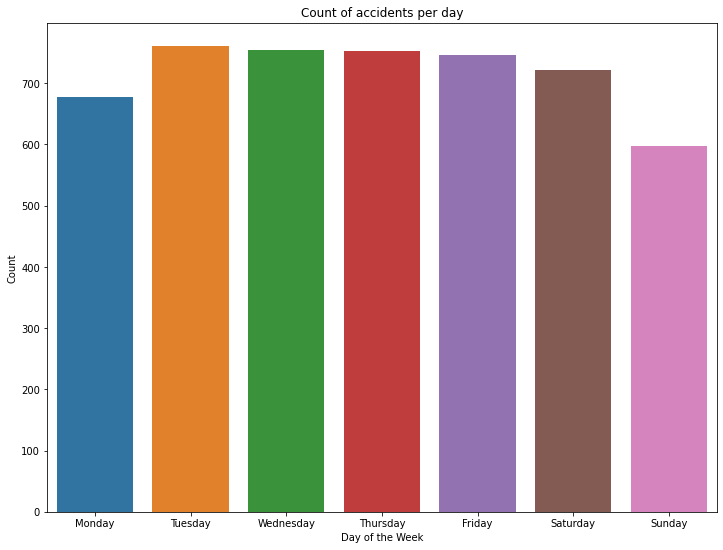

In [22]:
#no of accident by day of the week
df = dataset.groupby('day')['date'].count().reset_index()
plt.figure(figsize=(12,9))
g = sns.barplot(x = 'day', y= 'date', data = df)
g.set( xlabel = "Day of the Week", ylabel = "Count", title= 'Count of accidents per day', xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [23]:
#no of accident by aircraft type
df = dataset.groupby('ac_type')['date'].count().reset_index()

In [24]:
max_value = df["date"].max()
position = df["date"].idxmax()
aircraft = df['ac_type'][position]
print("The max accident by a particular aircraft type is {s} and by {d} aircraft company".format(s=max_value, d=aircraft))

The max accident by a particular aircraft type is 333 and by DOUGLAS DC-3 aircraft company


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Aircraft_type'),
 Text(0.5, 1.0, 'Count of accidents( Top ten aircraft type)')]

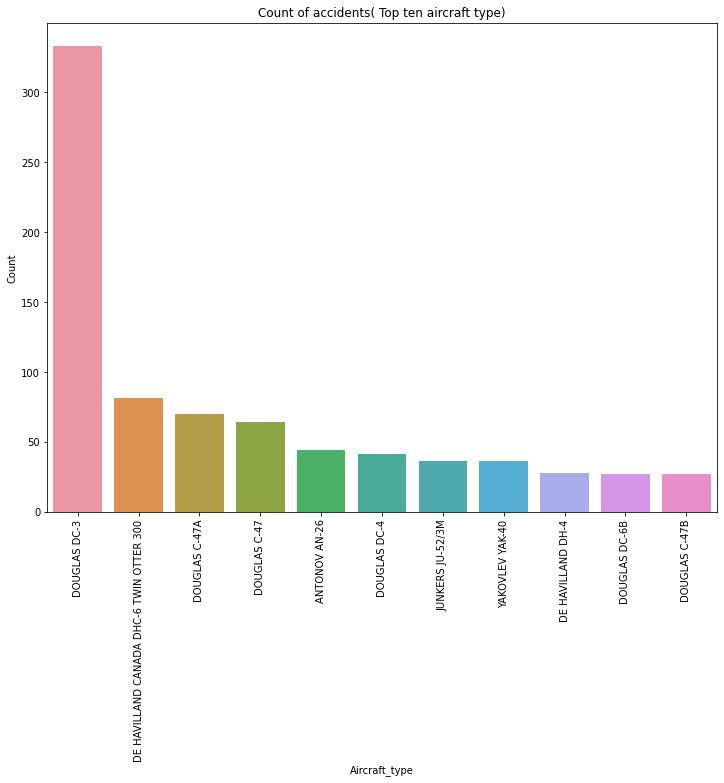

In [25]:
df = df.sort_values(by=['date'], ascending=False)
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
g = sns.barplot(x = 'ac_type', y= 'date', data = df[:11])
g.set( xlabel = "Aircraft_type", ylabel = "Count", title= 'Count of accidents( Top ten aircraft type)')

In [26]:
#no of accident by operator
df = dataset.groupby('operator')['date'].count().reset_index()


In [27]:
max_value = df["date"].max()
position = df["date"].idxmax()
operator = df['operator'][position]
print("The max accident by a operator is {s} and by {d} operator".format(s=max_value, d=operator))

The max accident by a operator is 253 and by AEROFLOT operator


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Operator'),
 Text(0.5, 1.0, 'Count of accidents( Top ten operators)')]

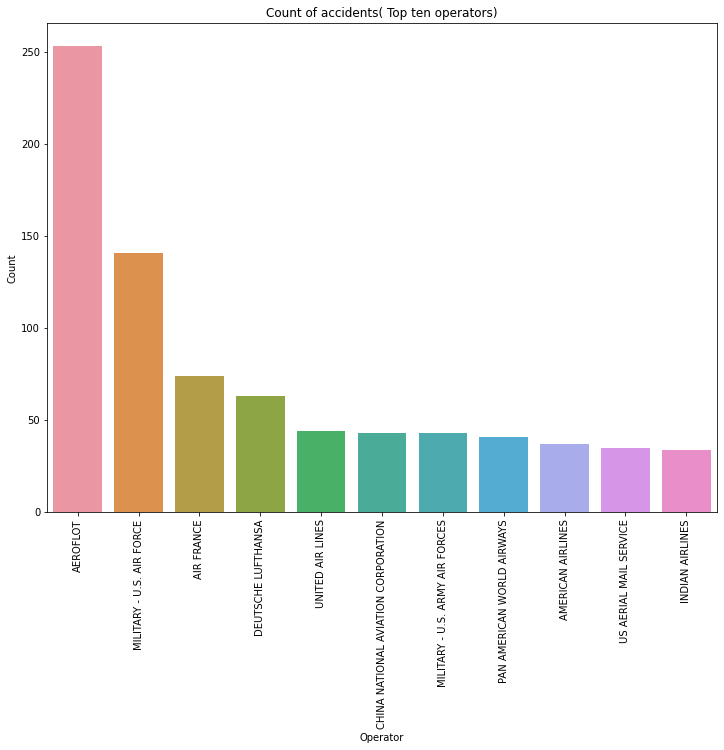

In [28]:
df = df.sort_values(by=['date'], ascending=False)
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
g = sns.barplot(x = 'operator', y= 'date', data = df[:11])
g.set( xlabel = "Operator", ylabel = "Count", title= 'Count of accidents( Top ten operators)')

In [29]:
#no of accident by military/private operator
df = dataset.groupby('military_private')['date'].count().reset_index()
df.head()

,military_private,date
0,military,762
1,private,4236


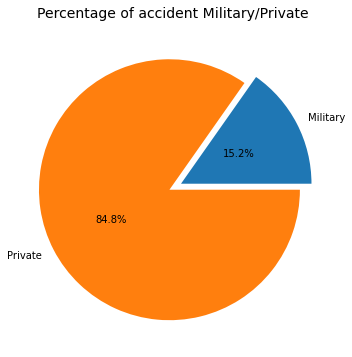

In [30]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Military','Private']
plt.pie(x=df['date'], autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Percentage of accident Military/Private ", fontsize=14);

In [31]:
#no of accident by location
df = dataset.groupby('location')['date'].count().reset_index()
df = df.sort_values(by=['date'], ascending=False)


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Location'),
 Text(0.5, 1.0, 'Count of accidents( Top ten locations)')]

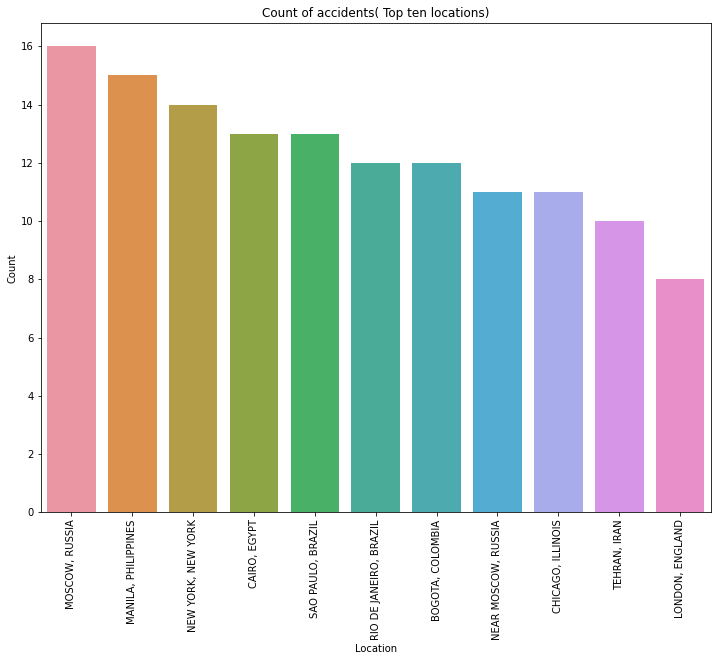

In [32]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
g = sns.barplot(x = 'location', y= 'date', data = df[:11])
g.set( xlabel = "Location", ylabel = "Count", title= 'Count of accidents( Top ten locations)')

In [33]:
#proportion of people aboard that died to those that survived
df = dataset.copy()
df['all_fatalities'] = df['all_fatalities'].replace(np.nan, '0')
df['all_aboard'] = df['all_aboard'].replace(np.nan, '0')
df['all_fatalities'] = df['all_fatalities'].astype(int)
df['all_aboard'] = df['all_aboard'].astype(int)
df = df.groupby(['year']).agg({"all_aboard":"sum","all_fatalities":"sum"}).reset_index()


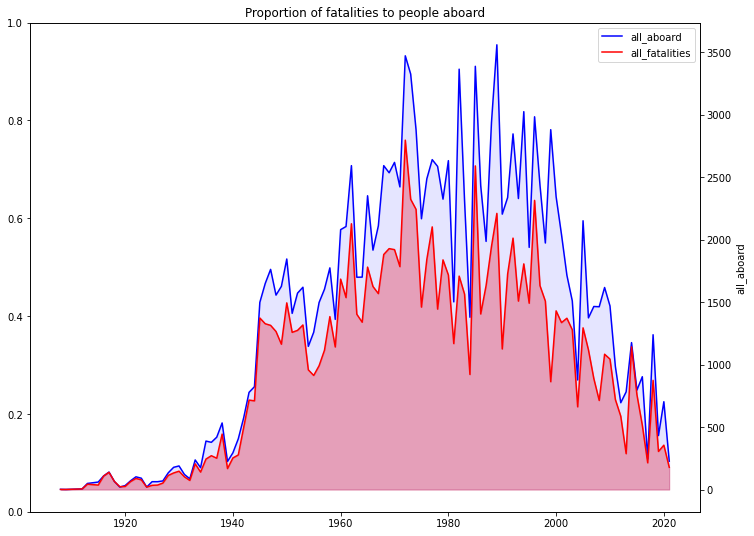

In [34]:
plt.figure(figsize=(12,9))
g2 = plt.twinx()
sns.lineplot(data = df, x = df['year'], y = df['all_aboard'] ,color="b")

sns.lineplot(data = df, x = df['year'], y = df['all_fatalities'] ,color="r", ax = g2)
plt.legend(labels=['all_aboard','all_fatalities'])
g2.set(  title= 'Proportion of fatalities to people aboard')
plt.fill_between(df['year'], df['all_fatalities'], color="red", alpha=0.3)
plt.fill_between(df['year'], df['all_aboard'], color="blue", alpha=0.1)
plt.show()